## Implementing $QR$ and $QL$ Decomposition using Householder Reflections and Gram-Schmidt Processes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import copy
import time

### $QR$ Decomposition via Householder reflectors:

In [93]:
def QRHouseholder(A, method='normal'):
    """
    Compute thin QR factorization of A = Q * R  using Householder reflectors,
    Input:  A         ---  an m by n matrix with m >= n (type: 2D numpy array)
            method    ---  (optional) case insensitive string,
                           can be  'slow' or any other values, or ommitted

    Output: Q ---  Q is the unitary m by n matrix.  
            R ---  the upper triangular nxn matrix  (pay attention to the size of L)
            err ---  optional. if present, err[0] = norm(A-Q*R)
                                           err[1] = norm(eye(m)-Q'*Q)

    NOTE: A must be an element of the real (mxn) subspace
          m must be greater than or equal to n for rank(A)=n to hold
    """

    # Set m and n equal to respective length and width of matrix
    m, n = A.shape

    # Set the initial condition
    if m < n:
        raise ValueError("m must be greater than or equal to n for rank(A)=n to hold")
    
    # If not indicated as slow, make it "normal"
    if method not in ["slow", "SLOW"]:
        method = "normal"

    """
        Compute the factor R of a QR factorization of an m x n matrix A with m ≥ n.

        Note that A=QR
           Q is a unitary matrix with orthonormal columns
           R is an upper triangular matrix

    """

    # Slow QR decomposition (Runtime increases severely as the size of the matrix increases)
    if method in ["slow", "SLOW"]:
        R = copy.deepcopy(A)
        Q = np.eye(m)
        err = np.array([0.,0.])
    
        # Start looping
        for i in range(n):
            # Choose reflector v = sign(x[0]) * norm2(x) * e1 + x
            x = R[i:,i]
            norm_x = np.linalg.norm(x)

            # Find v vector
            alpha = -np.sign(x[0])
            v = copy.deepcopy(x)
            e1 = np.zeros(m-i)
            e1[0] = 1.0
            v = (alpha * norm_x * e1) + x
            v /= np.linalg.norm(v) # Equivalent of v'v in deniminator of I - 2vv'/v'v

            # Equate Q_i to the identity matrix and later edit respective sections necessary to edit
            Q_i = np.eye(m)

            # # Edit the lower (m-i x m-i) portion of the H_i matrix
            for j in range(i,m):
                Q_i[i:,j] = Q_i[i:,j] - 2 * ((v * (v.T @ Q_i[i:,j]))) # (m x m) matrix

            # Save Q_i to a list so we can use it in multiplication later
            Q = Q @ Q_i

            # Calculate R as well
            R = Q_i @ R

        # Deleting values really close to machine epsilon but not exactly equated there yet
        R = np.triu(R)
    
        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ R)
        err[1] = np.linalg.norm(np.eye(m) - Q.T @ Q)

        return R, Q, err


    # Normal QR Decomposition method via Household Reflectors
    else:
        # Declare necessary return variables, will be adjusted later in the code
        R = copy.deepcopy(A)
        Q = np.eye(m)
        err = np.array([0.,0.])

        # Start looping
        for i in range(n):
            # Choose reflector v = sign(x[0]) * norm2(x) * e1 + x
            x = R[i:,i]
            norm_x = np.linalg.norm(x)

            # Find v vector
            alpha = -np.sign(x[0])
            v = copy.deepcopy(x)
            e1 = np.zeros(m-i)
            e1[0] = 1.0
            v = (alpha * norm_x * e1) + x
            v /= np.linalg.norm(v) # Equivalent of v'v in deniminator of I - 2vv'/v'v

            # Now apply our householder reflector, even though we didn't technically create Q_i
            for j in range(i,n):
                R[i:,j] = R[i:,j] - 2 * (v  * (v.T @ R[i:,j]))

            # Update Q columns in an inverted way to achieve our results
            for j in range(m):
                Q[j,i:] = Q[j,i:] - 2 * (v * (v.T @ Q[j,i:])) # (m x m) matrix


        # Finalize calculations to erase values that almost but don't reach machine epsilon
        R = np.triu(R) 

        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ R)
        err[1] = np.linalg.norm(np.eye(m) - Q.T @ Q)


        return R, Q, err



Testing $QR$ Decomposition via Householder Reflectors with a test matrices $A$ of size $m$ x $n$...

In [96]:
## Test 1
print(f"\n Test 1.SLOW of the QRHouseholder() code \n")
m_qrtest, n_qrtest = 20, 10
A_qrtest = np.random.random((m_qrtest, n_qrtest))
__, ___, err_qrtest = QRHouseholder(A_qrtest, "slow")
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 1.FAST of the QRHouseholder() code \n")
__, ___, err_qrtest = QRHouseholder(A_qrtest)
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")


## Test 2
print(f"\n Test 2.SLOW of the QRHouseholder() code \n")
m_qrtest, n_qrtest = 50, 20
A_qrtest = np.random.random((m_qrtest, n_qrtest))
__, ___, err_qrtest = QRHouseholder(A_qrtest, "slow")
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 2.FAST of the QRHouseholder() code \n")
__, ___, err_qrtest = QRHouseholder(A_qrtest)
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")



 Test 1.SLOW of the QRHouseholder() code 

   size(A) = (20 x 10); norm(A,1) = 13.278764881827687
   factorization_error = 2.6226500503830887e-15; orth_error = 2.4836369149068675e-15

 Test 1.FAST of the QRHouseholder() code 

   size(A) = (20 x 10); norm(A,1) = 13.278764881827687
   factorization_error = 2.389471866740419e-15; orth_error = 2.5711574910368407e-15

 Test 2.SLOW of the QRHouseholder() code 

   size(A) = (50 x 20); norm(A,1) = 27.919244135355566
   factorization_error = 1.298566745337976e-14; orth_error = 9.87397301251403e-15

 Test 2.FAST of the QRHouseholder() code 

   size(A) = (50 x 20); norm(A,1) = 27.919244135355566
   factorization_error = 9.912756818789453e-15; orth_error = 3.993161294892303e-15


### Plot the Householder $QR$ Subplots

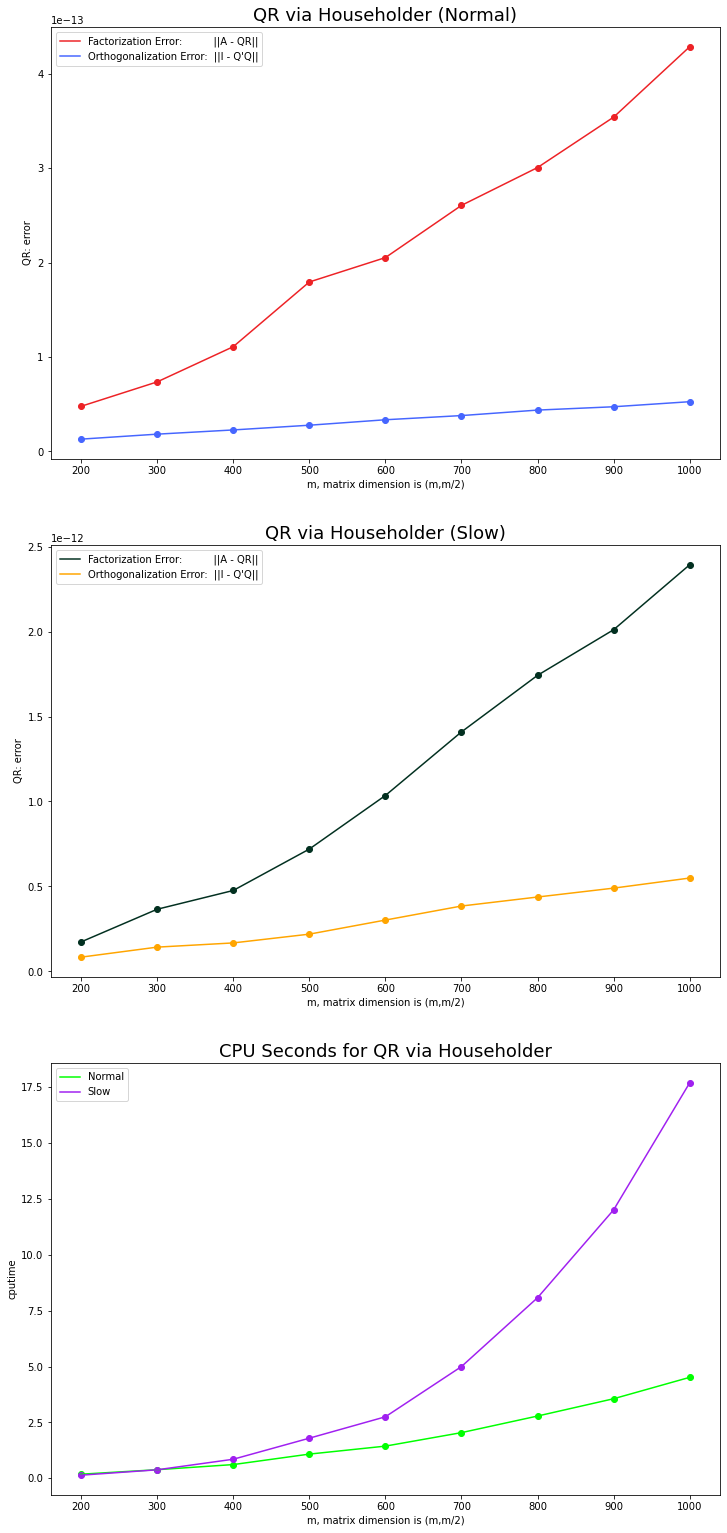

In [67]:
# Create x and y values necessary for plotting errors
x_vals = np.linspace(200,1000,9)
A_householders = [np.random.random((int(x), int(x/2))) for x in x_vals]
householder_errors = np.array([QRHouseholder(A)[2] for A in A_householders])
fact_errors = householder_errors[:,0]
orth_errors = householder_errors[:,1]

householder_errors_slow = np.array([QRHouseholder(A, "slow")[2] for A in A_householders])
fact_errors_slow = householder_errors_slow[:,0]
orth_errors_slow = householder_errors_slow[:,1]

# Calculate runtimes for slow and normal methods
slow_times = []
for A in A_householders:
    st = time.time()
    buffer = QRHouseholder(A, "slow")
    et = time.time()
    slow_times.append(et-st)

normal_times = []
for A in A_householders:
    st = time.time()
    buffer = QRHouseholder(A)
    et = time.time()
    normal_times.append(et-st)

# Use x and y values to generate matrices for our plot
fig, ax = plt.subplots(3, figsize=(12,27))

ax[0].scatter(x_vals, fact_errors, color="#ED2226")
ax[0].scatter(x_vals, orth_errors, color="#4666ff")
ax[0].plot(x_vals, fact_errors, color="#ED2226", label="Factorization Error:          ||A - QR||")
ax[0].plot(x_vals, orth_errors, color="#4666ff", label="Orthogonalization Error:  ||I - Q'Q||")
ax[0].set_title("QR via Householder (Normal)", size=18)
ax[0].set_xlabel("m, matrix dimension is (m,m/2)")
ax[0].set_ylabel("QR: error")
ax[0].legend()

ax[1].scatter(x_vals, fact_errors_slow, color="#023020")
ax[1].scatter(x_vals, orth_errors_slow, color="#FFA500")
ax[1].plot(x_vals, fact_errors_slow, color="#023020", label="Factorization Error:          ||A - QR||")
ax[1].plot(x_vals, orth_errors_slow, color="#FFA500", label="Orthogonalization Error:  ||I - Q'Q||")
ax[1].set_title("QR via Householder (Slow)", size=18)
ax[1].set_xlabel("m, matrix dimension is (m,m/2)")
ax[1].set_ylabel("QR: error")
ax[1].legend()

ax[2].scatter(x_vals, normal_times, color="#00FF00")
ax[2].scatter(x_vals, slow_times, color="#A020F0")
ax[2].plot(x_vals, normal_times, color="#00FF00", label="Normal")
ax[2].plot(x_vals, slow_times, color="#A020F0", label="Slow")
ax[2].set_title("CPU Seconds for QR via Householder", size=18)
ax[2].set_xlabel("m, matrix dimension is (m,m/2)")
ax[2].set_ylabel("cputime")
ax[2].legend()

plt.savefig("QRHouseholder.png")
plt.show()

### $QL$ Decomposition via Householder Reflectors

In [161]:
def QLHouseholder(A, method='normal'):
    """
     Compute thin QL factorization of A = Q * L  using Householder reflectors
   
     Input:  A         ---  an m by n matrix with m >= n
 
     Output: Q ---  Q is the unitary m by n matrix 
             L ---  the lower triangular nxn matrix (pay attention to the size of L)
             err ---  optional. if present, err[0] = norm(A-Q*L)
                                            err[1] = norm(eye(m)-Q'*Q)

     NOTE: A must be an element of the real (mxn) subspace
           m must be greater than or equal to n for rank(A)=n to hold
    """

    # Set m and n equal to respective length and width of matrix
    m, n = A.shape

    # Set the initial condition
    if m < n:
        raise ValueError("m must be greater than or equal to n for rank(A)=n to hold")
    
    # If not indicated as slow, make it "normal"
    if method not in ["slow", "SLOW"]:
        method = "normal"

    """
        Note that A=QL
           Q is a unitary matrix with orthonormal columns
           L is a lower triangular matrix
    """

    # Slow QL decomposition (Runtime increases severely as the size of the matrix increases)
    if method in ["slow", "SLOW"]:
        L = copy.deepcopy(A)
        Q = np.eye(m)
        err = np.array([0.,0.])
    
        # Start looping (Iterate backwards in the QL case)
        for i in range(-1,-n-1,-1):

            # Choose reflector v = sign(x[0]) * norm2(x) * e1 + x
            x = L[i::-1,i]
            norm_x = np.linalg.norm(x)

            # Find v vector
            alpha = -np.sign(x[0])
            v = copy.deepcopy(x)
            e1 = np.zeros(len(x))
            e1[0] = 1.0
            v = (alpha * norm_x * e1) + x
            v /= np.linalg.norm(v) # Equivalent of v'v in deniminator of I - 2vv'/v'v

            # Equate Q_i to the identity matrix and later edit respective sections necessary to edit
            Q_i = np.eye(m)

            # Edit the lower-left (m-i x m-i) portion of the Q_i matrix
            for j in range(m):
                Q_i[i::-1,j] = Q_i[i::-1,j] - 2 * ((v * (v.T @ Q_i[i::-1,j]))) # (m x m) matrix

            # Save Q_i to a list so we can use it in multiplication later
            Q = Q @ Q_i

            # Calculate L as well
            L = Q_i @ L

        # Deleting values really close to machine epsilon but not exactly equated there yet
        L = np.tril(L)
    
        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ L)
        err[1] = np.linalg.norm(np.eye(m) - Q.T @ Q)

        return L, Q, err


    # Normal QL Decomposition method via Household Reflectors
    else:
        # Declare necessary return variables, will be adjusted later in the code
        L = copy.deepcopy(A)
        Q = np.eye(m)
        err = np.array([0.,0.])

        # Start looping backwards    [ range(start,stop,step) : Python indexing stops 1 before the indicated stopping point ]
        for i in range(-1,-n-1,-1):
            
            # Choose reflector v = sign(x[0]) * norm2(x) * e1 + x
            x = L[i::-1,i]
            norm_x = np.linalg.norm(x)

            # Find v vector
            alpha = -np.sign(x[0])
            v = copy.deepcopy(x)
            e1 = np.zeros(len(x))
            e1[0] = 1.0
            v = (alpha * norm_x * e1) + x
            v /= np.linalg.norm(v) # Equivalent of v'v in deniminator of I - 2vv'/v'v

            # Now apply our householder reflector, even though we didn't technically create Q_i
            for j in range(i,-n-1,-1):
                L[i::-1,j] = L[i::-1,j] - 2 * (v  * (v.T @ L[i::-1,j]))

            # Update Q columns in an inverted way to achieve our results
            for j in range(m):
                Q[j,i::-1] = Q[j,i::-1] - 2 * (v * (v.T @ Q[j,i::-1])) # (m x m) matrix

        # Finalize calculations to erase values that almost but don't reach machine epsilon
        L = np.tril(L) 

        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ L)
        err[1] = np.linalg.norm(np.eye(m) - Q.T @ Q)


        return L, Q, err



Testing $QL$ Decomposition via Householder Reflectors with a test matrices $A$ of size $m$ x $n$...

In [165]:
## Test 1
print(f"\n Test 1.SLOW of the QLHouseholder() code \n")
m_qrtest, n_qrtest = 20, 10
A_qrtest = np.random.random((m_qrtest, n_qrtest))
err_qrtest = QLHouseholder(A_qrtest, "slow")[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 1.FAST of the QLHouseholder() code \n")
err_qrtest = QLHouseholder(A_qrtest)[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")


## Test 2
print(f"\n Test 2.SLOW of the QLHouseholder() code \n")
m_qrtest, n_qrtest = 50, 20
A_qrtest = np.random.random((m_qrtest, n_qrtest))
err_qrtest = QLHouseholder(A_qrtest, "slow")[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 2.FAST of the QLHouseholder() code \n")
err_qrtest = QLHouseholder(A_qrtest)[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")



 Test 1.SLOW of the QLHouseholder() code 

   size(A) = (20 x 10); norm(A,1) = 12.14256305155817
   factorization_error = 2.6978402543784104e-15; orth_error = 2.710443909824157e-15

 Test 1.FAST of the QLHouseholder() code 

   size(A) = (20 x 10); norm(A,1) = 12.14256305155817
   factorization_error = 3.0835845508282293e-15; orth_error = 2.1518769226047173e-15

 Test 2.SLOW of the QLHouseholder() code 

   size(A) = (50 x 20); norm(A,1) = 29.475652129407166
   factorization_error = 1.1461657227262071e-14; orth_error = 1.1259383971459676e-14

 Test 2.FAST of the QLHouseholder() code 

   size(A) = (50 x 20); norm(A,1) = 29.475652129407166
   factorization_error = 8.071373167832861e-15; orth_error = 4.9387947839587445e-15


### Plot the Householder $QL$ Subplots

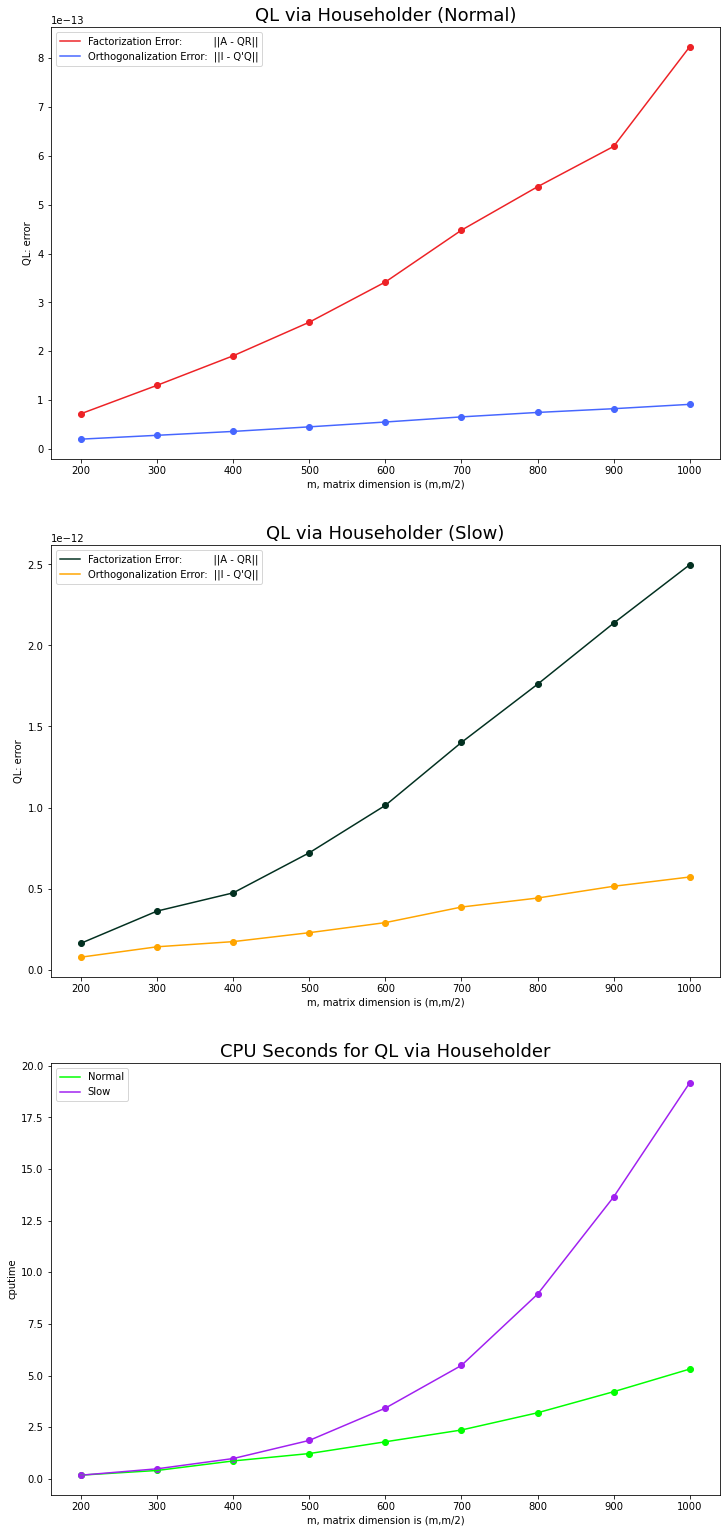

In [164]:
# Create x and y values necessary for plotting errors
x_vals = np.linspace(200,1000,9)
A_householders = [np.random.random((int(x), int(x/2))) for x in x_vals]
householder_errors = np.array([QLHouseholder(A)[2] for A in A_householders])
fact_errors = householder_errors[:,0]
orth_errors = householder_errors[:,1]

householder_errors_slow = np.array([QLHouseholder(A, "slow")[2] for A in A_householders])
fact_errors_slow = householder_errors_slow[:,0]
orth_errors_slow = householder_errors_slow[:,1]

# Calculate runtimes for slow and normal methods
slow_times = []
for A in A_householders:
    st = time.time()
    buffer = QLHouseholder(A, "slow")
    et = time.time()
    slow_times.append(et-st)

normal_times = []
for A in A_householders:
    st = time.time()
    buffer = QLHouseholder(A)
    et = time.time()
    normal_times.append(et-st)

# Use x and y values to generate matrices for our plot
fig, ax = plt.subplots(3, figsize=(12,27))

ax[0].scatter(x_vals, fact_errors, color="#ED2226")
ax[0].scatter(x_vals, orth_errors, color="#4666ff")
ax[0].plot(x_vals, fact_errors, color="#ED2226", label="Factorization Error:          ||A - QR||")
ax[0].plot(x_vals, orth_errors, color="#4666ff", label="Orthogonalization Error:  ||I - Q'Q||")
ax[0].set_title("QL via Householder (Normal)", size=18)
ax[0].set_xlabel("m, matrix dimension is (m,m/2)")
ax[0].set_ylabel("QL: error")
ax[0].legend()

ax[1].scatter(x_vals, fact_errors_slow, color="#023020")
ax[1].scatter(x_vals, orth_errors_slow, color="#FFA500")
ax[1].plot(x_vals, fact_errors_slow, color="#023020", label="Factorization Error:          ||A - QR||")
ax[1].plot(x_vals, orth_errors_slow, color="#FFA500", label="Orthogonalization Error:  ||I - Q'Q||")
ax[1].set_title("QL via Householder (Slow)", size=18)
ax[1].set_xlabel("m, matrix dimension is (m,m/2)")
ax[1].set_ylabel("QL: error")
ax[1].legend()

ax[2].scatter(x_vals, normal_times, color="#00FF00")
ax[2].scatter(x_vals, slow_times, color="#A020F0")
ax[2].plot(x_vals, normal_times, color="#00FF00", label="Normal")
ax[2].plot(x_vals, slow_times, color="#A020F0", label="Slow")
ax[2].set_title("CPU Seconds for QL via Householder", size=18)
ax[2].set_xlabel("m, matrix dimension is (m,m/2)")
ax[2].set_ylabel("cputime")
ax[2].legend()

plt.savefig("QLHouseholder.png")
plt.show()

### Question 1.3:   $QR$ and $QL$ via Classical Gram-Schmidt (CGS) and modified Gram-Schmidt (MGS)

### Find $QR$ Decompositions First

In [219]:
def QR_GramSchmidt(A, method="mgs"):
    """
    Compute thin QR factorization of A = Q * R  using various implementations
    of the Gram-Schmidt method
  
    Input:  A         ---  an m by n matrix with m >= n
            method    ---  (optional) a case insensitive string, it can be 
                      'cgs'  (classical Gram-Schmidt);
                      'mgs'  (modified Gram-Schmidt), make it the default when 'method' is not present

    Output: Q         ---  Q contains orthonormal columns, i.e. Q'*Q=I_n
            R         ---  the upper triangular n-by-n matrix 
            err       ---  optional.  if present, err[0] = norm(A-Q*R)
                                                  err[1] = norm(eye(n)-Q'*Q)

    """
    # Default method: MGS
    if method not in ["cgs", "CGS"]:
        method = "mgs"

    # Variables m and n for (m x n) shape matrix
    m, n = A.shape

    if m < n:
        raise ValueError("m must be ≥ n for rank(A)=n to hold")

    # QR Decomposition via Modern Gram Schmidt Method (MGS)
    if method in ["mgs", "MGS"]:

        # Declare return type variables to manipulate throughout this algorithm
        Q = copy.deepcopy(A)
        R = np.zeros((n,n))
        err = np.array([0.,0.])
        
        # Loop to edit rows and columns of Q and R
        for i in range(n):

            # Set R[i,i] equal to the 2norm of Q[:,i]
            R[i,i] = np.linalg.norm(Q[:,i]) 

            # Exception handling
            if R[i,i] == 0:
                raise ValueError(f"Divide by Zero error: R[{i},{i}] cannot equal zero")

            # Divide by 2norm of Q's i'th column
            Q[:,i] = Q[:,i] / R[i,i]   

            # BLAS2 Computation to update R then Q
            R[i,i+1:] = Q[:,i].T @ Q[:,i+1:]

            # Update j'th columns after i using the i'th column of Q and (i,j) elements of R
            for j in range(i+1,n):
                Q[:,j] = Q[:,j] - (Q[:,i] * R[i,j])

        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ R)
        err[1] = np.linalg.norm(np.eye(n) - Q.T @ Q)


        return R, Q, err
    
    # QR Decomposition via Classical Gram Schmidt Method (CGS)
    # WARNING: NUMERICALLY UNSTABLE
    else:
        # Declare return type variables to manipulate throughout this algorithm
        Q = copy.deepcopy(A)
        R = np.zeros((n,n))
        err = np.array([0.,0.])

        # Loop to edit rows and columns of Q and R
        for i in range(n):

            # Set R[i,i] equal to the 2norm of Q[:,i]
            R[i,i] = np.linalg.norm(Q[:,i]) 

            # Exception handling
            if R[i,i] == 0:
                raise ValueError(f"Divide by Zero error: R[{i},{i}] cannot equal zero")

            # Divide by 2norm of Q's i'th column
            Q[:,i] = Q[:,i] / R[i,i]   

            # BLAS2 Computation to update R then Q
            R[i,i+1:] = Q[:,i].T @ A[:,i+1:]

            # Update j'th columns after i using the i'th column of Q and (i,j) elements of R
            for j in range(i+1,n):
                Q[:,j] = Q[:,j] - (Q[:,i] * R[i,j])

        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ R)
        err[1] = np.linalg.norm(np.eye(n) - Q.T @ Q)


        return R, Q, err
        

    

Testing $QR$ Decomposition via Gram-Schmidt with test matrices $A$ of size $m$ x $n$...

In [166]:
## Test 1
print(f"\n Test 1.MGS of the QR_GramSchmidt() code \n")
m_qrtest, n_qrtest = 20, 10
A_qrtest = np.random.random((m_qrtest, n_qrtest))
err_qrtest = QR_GramSchmidt(A_qrtest)[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 1.CGS of the QR_GramSchmidt() code \n")
err_qrtest = QR_GramSchmidt(A_qrtest, "cgs")[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")


## Test 2
print(f"\n Test 2.MGS of the QR_GramSchmidt() code \n")
m_qrtest, n_qrtest = 50, 20
A_qrtest = np.random.random((m_qrtest, n_qrtest))
err_qrtest = QR_GramSchmidt(A_qrtest)[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 2.CGS of the QR_GramSchmidt() code \n")
err_qrtest = QR_GramSchmidt(A_qrtest, "cgs")[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")



 Test 1.MGS of the QR_GramSchmidt() code 

   size(A) = (20 x 10); norm(A,1) = 12.117812376467096
   factorization_error = 7.801107598076056e-16; orth_error = 2.1730255435682432e-15

 Test 1.CGS of the QR_GramSchmidt() code 

   size(A) = (20 x 10); norm(A,1) = 12.117812376467096
   factorization_error = 8.576273566203668e-16; orth_error = 2.900135664755008e-15

 Test 2.MGS of the QR_GramSchmidt() code 

   size(A) = (50 x 20); norm(A,1) = 28.562835658096176
   factorization_error = 2.7623055112380984e-15; orth_error = 3.066491713995117e-15

 Test 2.CGS of the QR_GramSchmidt() code 

   size(A) = (50 x 20); norm(A,1) = 28.562835658096176
   factorization_error = 2.673035308792668e-15; orth_error = 9.646406489175707e-15


### Find the Gram-Schmidt $QR$ Subplots

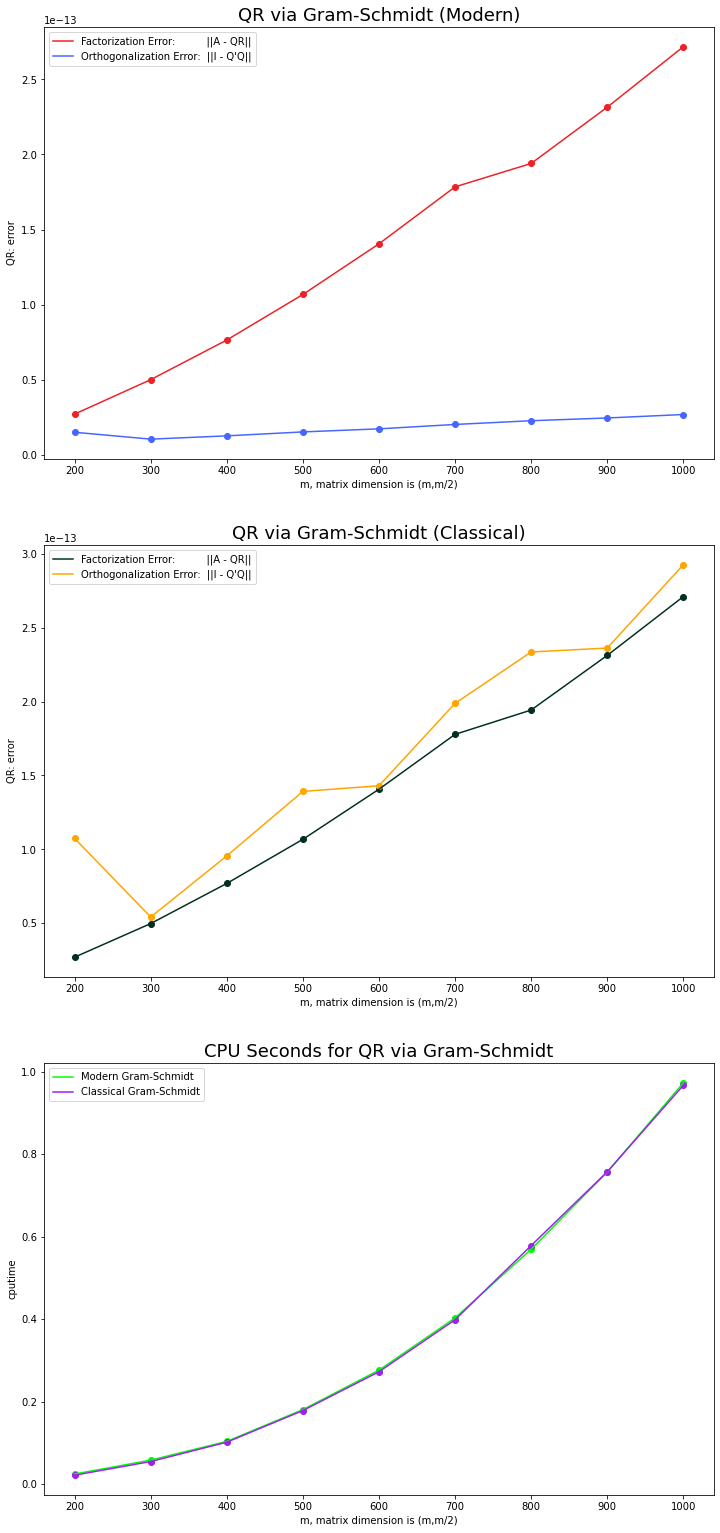

In [169]:
# Create x and y values necessary for plotting errors
x_vals = np.linspace(200,1000,9)
A_gs = [np.random.random((int(x), int(x/2))) for x in x_vals]
mgs_errors = np.array([QR_GramSchmidt(A)[2] for A in A_gs])
mgs_fact_errors = mgs_errors[:,0]
mgs_orth_errors = mgs_errors[:,1]
cgs_errors = np.array([QR_GramSchmidt(A, "cgs")[2] for A in A_gs])
cgs_fact_errors = cgs_errors[:,0]
cgs_orth_errors = cgs_errors[:,1]

# Calculate runtimes for slow and normal methods
mgs_times = []
for A in A_gs:
    st = time.time()
    buffer = QR_GramSchmidt(A)
    et = time.time()
    mgs_times.append(et-st)

cgs_times = []
for A in A_gs:
    st = time.time()
    buffer = QR_GramSchmidt(A)
    et = time.time()
    cgs_times.append(et-st)

# Use x and y values to generate matrices for our plot
fig, ax = plt.subplots(3, figsize=(12,27))

ax[0].scatter(x_vals, mgs_fact_errors, color="#ED2226")
ax[0].scatter(x_vals, mgs_orth_errors, color="#4666ff")
ax[0].plot(x_vals, mgs_fact_errors, color="#ED2226", label="Factorization Error:          ||A - QR||")
ax[0].plot(x_vals, mgs_orth_errors, color="#4666ff", label="Orthogonalization Error:  ||I - Q'Q||")
ax[0].set_title("QR via Gram-Schmidt (Modern)", size=18)
ax[0].set_xlabel("m, matrix dimension is (m,m/2)")
ax[0].set_ylabel("QR: error")
ax[0].legend()

ax[1].scatter(x_vals, cgs_fact_errors, color="#023020")
ax[1].scatter(x_vals, cgs_orth_errors, color="#FFA500")
ax[1].plot(x_vals, cgs_fact_errors, color="#023020", label="Factorization Error:          ||A - QR||")
ax[1].plot(x_vals, cgs_orth_errors, color="#FFA500", label="Orthogonalization Error:  ||I - Q'Q||")
ax[1].set_title("QR via Gram-Schmidt (Classical)", size=18)
ax[1].set_xlabel("m, matrix dimension is (m,m/2)")
ax[1].set_ylabel("QR: error")
ax[1].legend()

ax[2].scatter(x_vals, mgs_times, color="#00FF00")
ax[2].scatter(x_vals, cgs_times, color="#A020F0")
ax[2].plot(x_vals, mgs_times, color="#00FF00", label="Modern Gram-Schmidt")
ax[2].plot(x_vals, cgs_times, color="#A020F0", label="Classical Gram-Schmidt")
ax[2].set_title("CPU Seconds for QR via Gram-Schmidt", size=18)
ax[2].set_xlabel("m, matrix dimension is (m,m/2)")
ax[2].set_ylabel("cputime")
ax[2].legend()

plt.savefig("QRGramSchmidt.png")
plt.show()

### Now, find $QL$ decompositions

In [244]:
def QL_GramSchmidt(A, method="mgs"):
    """
    Compute thin QR factorization of A := Q * R  using various implementations
    of the Gram-Schmidt method
  
    Input:  A         ---  an m by n matrix with m ≥ n
            method    ---  (optional) a case insensitive string, it can be 
                      'cgs'  (classical Gram-Schmidt);
                      'mgs'  (modified Gram-Schmidt), make it the default when 'method' is not present

    Output: Q         ---  Q contains orthonormal columns, i.e. Q'*Q=I_n
            L         ---  the lower triangular n-by-n matrix 
            err       ---  optional.  if present, err[0] = norm(A-Q*L)
                                                  err[1] = norm(eye(n)-Q'*Q)

    """
    # Default method: MGS
    if method not in ["cgs", "CGS"]:
        method = "mgs"

    # Variables m and n for (m x n) shape matrix
    m, n = A.shape

    if m < n:
        raise ValueError("m must be ≥ n for rank(A)=n to hold")

    # QR Decomposition via Modern Gram Schmidt Method (MGS)
    if method in ["mgs", "MGS"]:

        # Declare return type variables to manipulate throughout this algorithm
        Q = copy.deepcopy(A)
        L = np.zeros((n,n))
        err = np.array([0.,0.])

        # Loop to edit rows and columns of Q and L
        for i in range(-1,-n-1,-1):

            # Set L[i,i] equal to the 2norm of Q[:,i]
            L[i,i] = np.linalg.norm(Q[:,i]) 

            # Exception handling
            if L[i,i] == 0:
                raise ValueError(f"Divide by Zero error: L[{i},{i}] cannot equal zero")

            # Divide by 2norm of Q's i'th column
            Q[:,i] = Q[:,i] / L[i,i]   

            # BLAS2 Computation to update R then Q
            L[i,i:-(n+1):-1] = Q[-1:-(m+1):-1,i].T @ Q[-1:-(m+1):-1,i::-1]

            # Update j'th columns after i using the i'th column of Q and (i,j) elements of R
            for j in range(i-1,-n-1,-1):
                Q[-1::-1,j] = Q[-1::-1,j] - (Q[-1::-1,i] * L[i,j])

        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ L)
        err[1] = np.linalg.norm(np.eye(n) - Q.T @ Q)


        return L, Q, err
    
    # QR Decomposition via Classical Gram Schmidt Method (CGS)
    # WARNING: NUMERICALLY UNSTABLE
    else:
       
        # Declare return type variables to manipulate throughout this algorithm
        Q = copy.deepcopy(A)
        L = np.zeros((n,n))
        err = np.array([0.,0.])

        # Loop to edit rows and columns of Q and L
        for i in range(-1,-n-1,-1):

            # Set L[i,i] equal to the 2norm of Q[:,i]
            L[i,i] = np.linalg.norm(Q[:,i]) 

            # Exception handling
            if L[i,i] == 0:
                raise ValueError(f"Divide by Zero error: L[{i},{i}] cannot equal zero")

            # Divide by 2norm of Q's i'th column
            Q[:,i] = Q[:,i] / L[i,i]   

            # BLAS2 Computation to update R then Q
            L[i,i:-(n+1):-1] = Q[-1:-(m+1):-1,i].T @ A[-1:-(m+1):-1,i::-1]

            # Update j'th columns after i using the i'th column of Q and (i,j) elements of R
            for j in range(i-1,-n-1,-1):
                Q[-1::-1,j] = Q[-1::-1,j] - (Q[-1::-1,i] * L[i,j])

        # Compute necessary errors
        err[0] = np.linalg.norm(A - Q @ L)
        err[1] = np.linalg.norm(np.eye(n) - Q.T @ Q)


        return L, Q, err
        

    

Testing $QL$ Decomposition via Gram-Schmidt with test matrices $A$ of size $m$ x $n$...

In [245]:
## Test 1
print(f"\n Test 1.MGS of the QL_GramSchmidt() code \n")
m_qrtest, n_qrtest = 20, 10
A_qrtest = np.random.random((m_qrtest, n_qrtest))
err_qrtest = QL_GramSchmidt(A_qrtest)[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 1.CGS of the QL_GramSchmidt() code \n")
err_qrtest = QL_GramSchmidt(A_qrtest, "cgs")[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")


## Test 2
print(f"\n Test 2.MGS of the QL_GramSchmidt() code \n")
m_qrtest, n_qrtest = 50, 20
A_qrtest = np.random.random((m_qrtest, n_qrtest))
err_qrtest = QL_GramSchmidt(A_qrtest)[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")

print(f"\n Test 2.CGS of the QL_GramSchmidt() code \n")
err_qrtest = QL_GramSchmidt(A_qrtest, "cgs")[2]
print(f"   size(A) = ({m_qrtest} x {n_qrtest}); norm(A,1) = {np.linalg.norm(A_qrtest, 1)}")
print(f"   factorization_error = {err_qrtest[0]}; orth_error = {err_qrtest[1]}")



 Test 1.MGS of the QL_GramSchmidt() code 

   size(A) = (20 x 10); norm(A,1) = 12.86711570732348
   factorization_error = 2.086460469360835; orth_error = 1.919396043357456e-15

 Test 1.CGS of the QL_GramSchmidt() code 

   size(A) = (20 x 10); norm(A,1) = 12.86711570732348
   factorization_error = 3.3958845921921055e-15; orth_error = 5.1802366982686386e-15

 Test 2.MGS of the QL_GramSchmidt() code 

   size(A) = (50 x 20); norm(A,1) = 30.54498073294048
   factorization_error = 5.790237827974972; orth_error = 4.335139987365163e-15

 Test 2.CGS of the QL_GramSchmidt() code 

   size(A) = (50 x 20); norm(A,1) = 30.54498073294048
   factorization_error = 1.1747209078473151e-14; orth_error = 1.634701455706478e-14


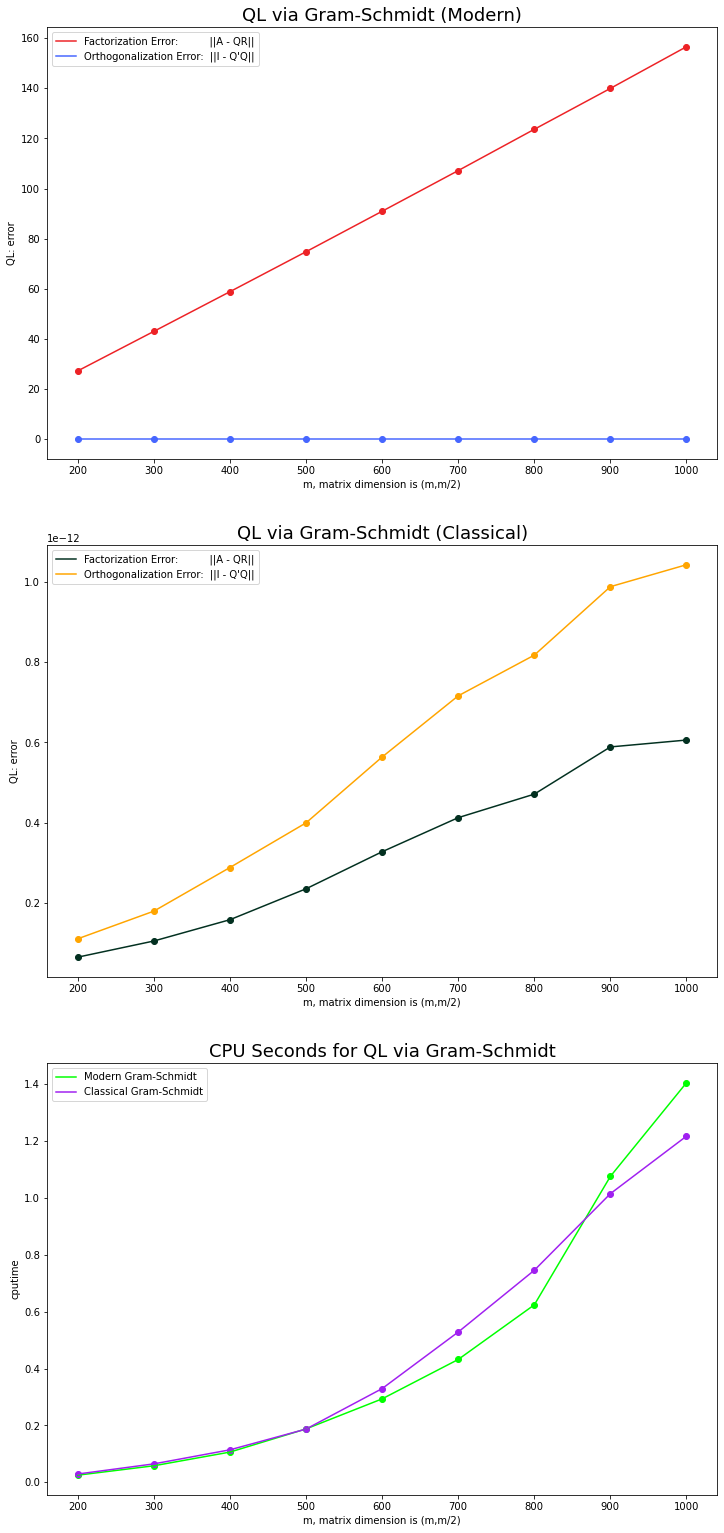

In [246]:
# Create x and y values necessary for plotting errors
x_vals = np.linspace(200,1000,9)
A_gs = [np.random.random((int(x), int(x/2))) for x in x_vals]
mgs_errors = np.array([QL_GramSchmidt(A)[2] for A in A_gs])
mgs_fact_errors = mgs_errors[:,0]
mgs_orth_errors = mgs_errors[:,1]
cgs_errors = np.array([QL_GramSchmidt(A, "cgs")[2] for A in A_gs])
cgs_fact_errors = cgs_errors[:,0]
cgs_orth_errors = cgs_errors[:,1]

# Calculate runtimes for slow and normal methods
mgs_times = []
for A in A_gs:
    st = time.time()
    buffer = QL_GramSchmidt(A)
    et = time.time()
    mgs_times.append(et-st)

cgs_times = []
for A in A_gs:
    st = time.time()
    buffer = QL_GramSchmidt(A)
    et = time.time()
    cgs_times.append(et-st)

# Use x and y values to generate matrices for our plot
fig, ax = plt.subplots(3, figsize=(12,27))

ax[0].scatter(x_vals, mgs_fact_errors, color="#ED2226")
ax[0].scatter(x_vals, mgs_orth_errors, color="#4666ff")
ax[0].plot(x_vals, mgs_fact_errors, color="#ED2226", label="Factorization Error:          ||A - QR||")
ax[0].plot(x_vals, mgs_orth_errors, color="#4666ff", label="Orthogonalization Error:  ||I - Q'Q||")
ax[0].set_title("QL via Gram-Schmidt (Modern)", size=18)
ax[0].set_xlabel("m, matrix dimension is (m,m/2)")
ax[0].set_ylabel("QL: error")
ax[0].legend()

ax[1].scatter(x_vals, cgs_fact_errors, color="#023020")
ax[1].scatter(x_vals, cgs_orth_errors, color="#FFA500")
ax[1].plot(x_vals, cgs_fact_errors, color="#023020", label="Factorization Error:          ||A - QR||")
ax[1].plot(x_vals, cgs_orth_errors, color="#FFA500", label="Orthogonalization Error:  ||I - Q'Q||")
ax[1].set_title("QL via Gram-Schmidt (Classical)", size=18)
ax[1].set_xlabel("m, matrix dimension is (m,m/2)")
ax[1].set_ylabel("QL: error")
ax[1].legend()

ax[2].scatter(x_vals, mgs_times, color="#00FF00")
ax[2].scatter(x_vals, cgs_times, color="#A020F0")
ax[2].plot(x_vals, mgs_times, color="#00FF00", label="Modern Gram-Schmidt")
ax[2].plot(x_vals, cgs_times, color="#A020F0", label="Classical Gram-Schmidt")
ax[2].set_title("CPU Seconds for QL via Gram-Schmidt", size=18)
ax[2].set_xlabel("m, matrix dimension is (m,m/2)")
ax[2].set_ylabel("cputime")
ax[2].legend()

plt.savefig("QLGramSchmidt.png")
plt.show()